In [ ]:
import pandas as pd
import networkx as nx
import os
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats


os.chdir("/Users/Daniela/Documents/EPFLMasters/Winter2/Ada/Project/ada-2024-project-theadacuates")
print(os.getcwd())

SAVE_FOLDER =  "data/output/graph_data"

/Users/Daniela/Documents/EPFLMasters/Winter2/Ada/Project/ada-2024-project-theadacuates


## Graph Construction

#### Unweighted directed graph that contains all possible connections between articles

In [37]:
df_links_s = pd.read_csv('data/output/base_data/links_simple_processed.csv')
df_a = pd.read_csv('data/output/base_data/articles_processed.csv')
# using networkx to create graph
G = nx.DiGraph()

G.add_edges_from(zip(df_links_s['link_source'], df_links_s['link_target']))

metrics = {
    "node": list(G.nodes),
    "in_degree": [G.in_degree(n) for n in G.nodes],
    "out_degree": [G.out_degree(n) for n in G.nodes],
    "pagerank": list(nx.pagerank(G).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G).values()),
    "closeness_centrality": list(nx.closeness_centrality(G).values())
}


In [38]:
df_metrics = pd.DataFrame(metrics)
df_metrics.head(10)
df_metrics.to_csv(os.path.join(SAVE_FOLDER, "all_connections_graph_metrics.csv"), index = False)

In [39]:
df_metrics.describe()

,in_degree,out_degree,pagerank,betweenness_centrality,closeness_centrality
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,26.106707,26.106707,0.000218,0.000423,0.284830
std,62.814636,24.196411,0.000432,0.001981,0.116919
min,0.000000,0.000000,0.000033,0.000000,0.000000
25%,2.000000,11.000000,0.000044,0.000006,0.263160
50%,8.000000,19.000000,0.000087,0.000061,0.313644
75%,25.000000,33.000000,0.000216,0.000305,0.354093
max,1551.000000,294.000000,0.009566,0.094090,0.590353


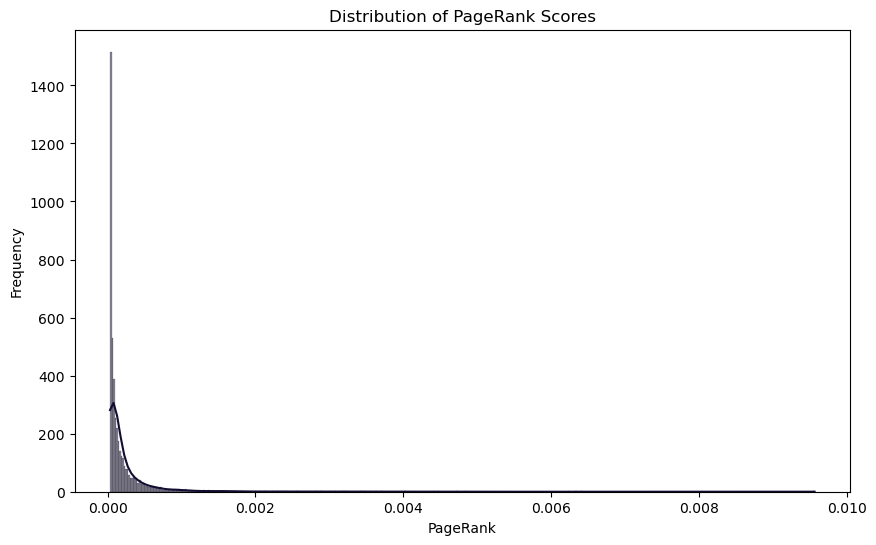

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df_metrics['pagerank'], kde=True)
plt.title("Distribution of PageRank Scores")
plt.xlabel("PageRank")
plt.ylabel("Frequency")
plt.show()

/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_90871/801242731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


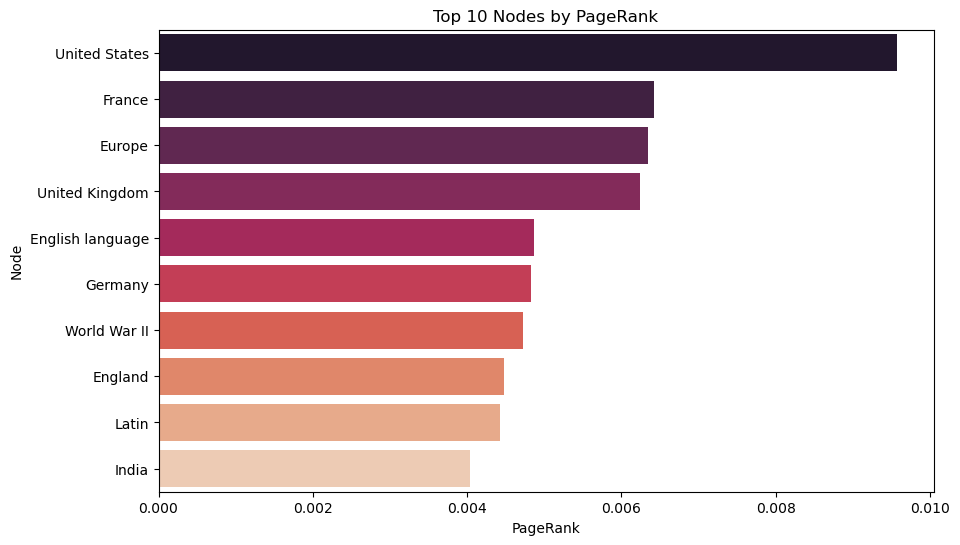

In [41]:
top_pagerank = df_metrics.sort_values(by="pagerank", ascending=False).head(10)
#ns.set_palette("rocket", len(top_pagerank))  # You can choose other palettes like "rocket", "magma", etc.


plt.figure(figsize=(10, 6))
sns.barplot(
    x="pagerank", 
    y="node", 
    data=top_pagerank, 
    palette="rocket"
)
plt.xlabel("PageRank")
plt.ylabel("Node")
plt.title("Top 10 Nodes by PageRank")
plt.show()

/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_90871/3096687186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


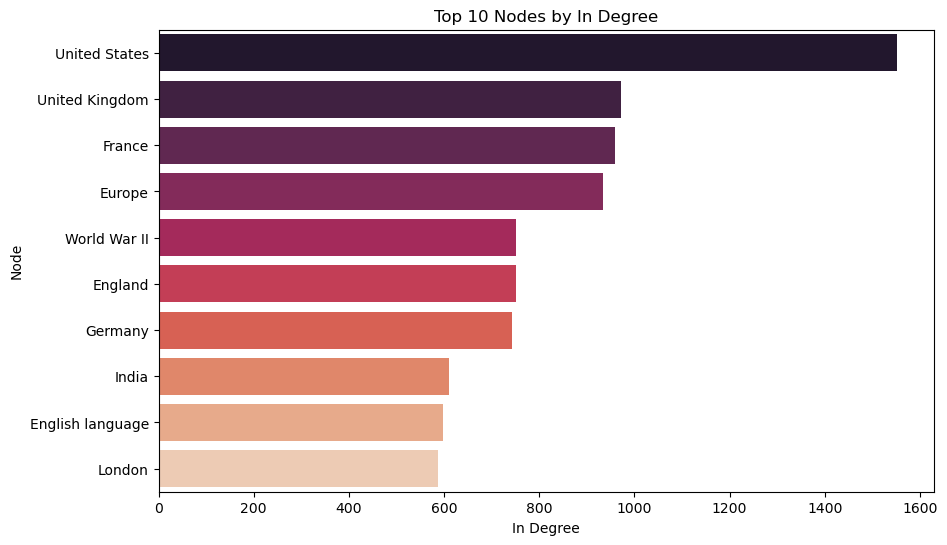

In [42]:
top_in_degree = df_metrics.sort_values(by="in_degree", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="in_degree", 
    y="node", 
    data=top_in_degree, 
    palette="rocket"
)
plt.xlabel("In Degree")
plt.ylabel("Node")
plt.title("Top 10 Nodes by In Degree")
plt.show()

/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_90871/3510129467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


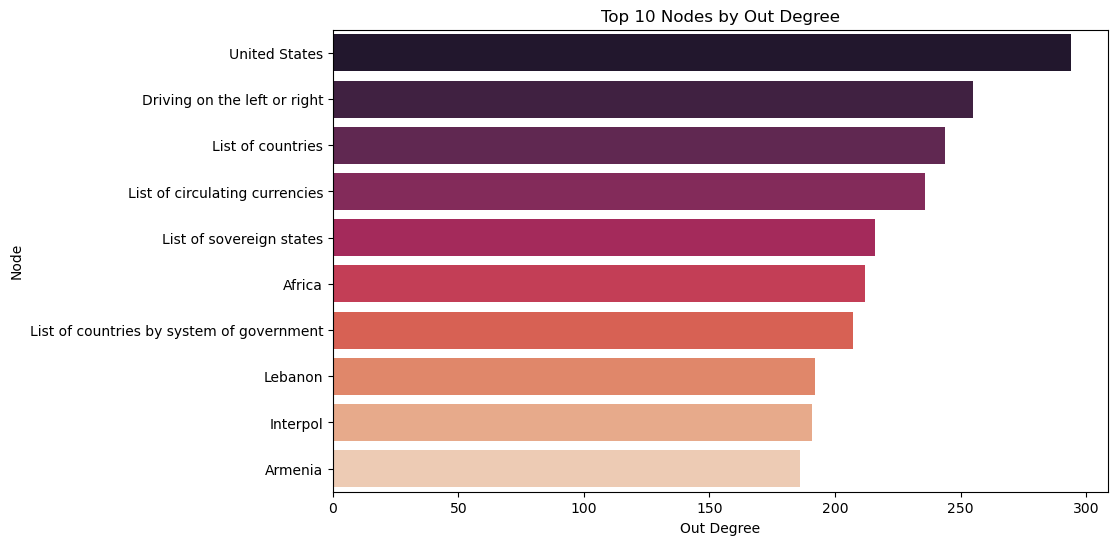

In [43]:
top_out_degree = df_metrics.sort_values(by="out_degree", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="out_degree", 
    y="node", 
    data=top_out_degree, 
    palette="rocket"
)
plt.xlabel("Out Degree")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Out Degree")
plt.show()

/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_90871/1904362250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


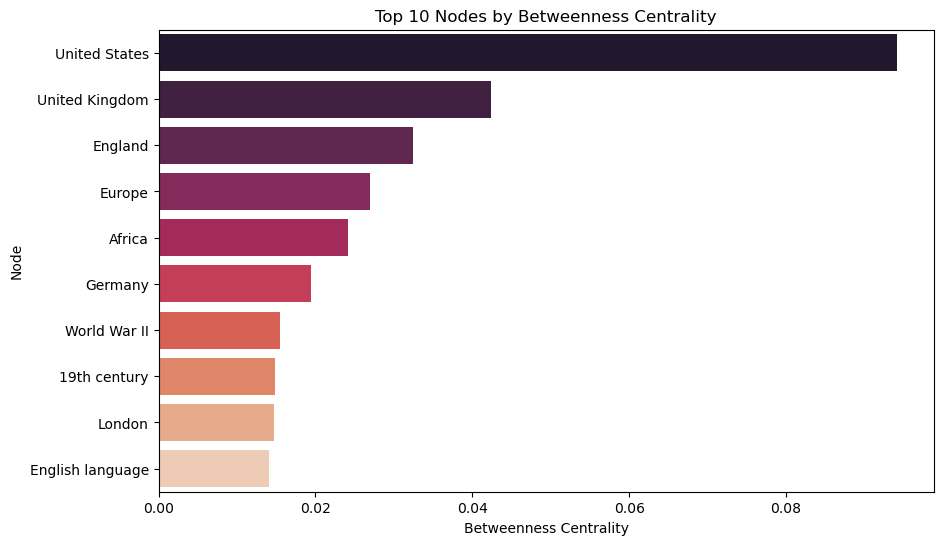

In [44]:
top_betweenness_centrality= df_metrics.sort_values(by="betweenness_centrality", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="betweenness_centrality", 
    y="node", 
    data=top_betweenness_centrality, 
    palette="rocket"
)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Betweenness Centrality")
plt.show()

/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_90871/2267271010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


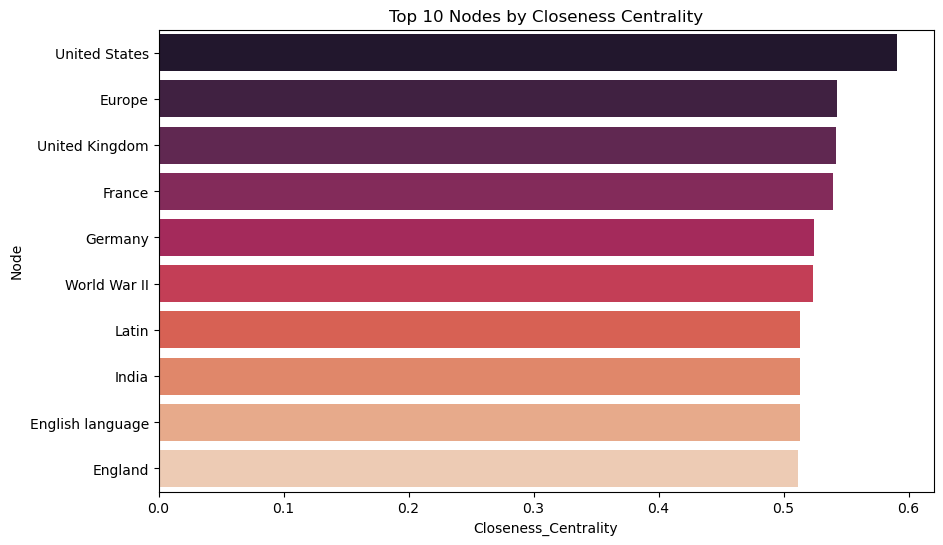

In [49]:
top_closeness_centrality= df_metrics.sort_values(by="closeness_centrality", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="closeness_centrality", 
    y="node", 
    data=top_closeness_centrality, 
    palette="rocket"
)
plt.xlabel("Closeness_Centrality")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Closeness Centrality")
plt.show()

### Played Games graph

In [78]:
#need to make a played links list that I can later use to make weighted and unweighted graphs
df_all = pd.read_csv('data/output/base_data/all_articles_processed.csv')

## this is an easy way to convert the object in resolve_path_list_name to an array of strings :D
links_list =[]
for path in df_all['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

all_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

all_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "all_played_links_simple.csv"), index = False)

all_played_links_df.head(10)

finished_paths_df = df_all[df_all['finished'] == True]
links_list =[]
for path in finished_paths_df['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

finished_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

finished_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "finished_played_links_simple.csv"), index = False)

unfinished_paths_df = df_all[df_all['finished'] == False]
links_list =[]
for path in unfinished_paths_df['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

unfinished_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

unfinished_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "unfinished_played_links_simple.csv"), index = False)


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_90871/3758280971.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/output/base_data/all_articles_processed.csv')


#### Unweighted directed graph that contains all connections made by humans when playing wikispeedia

In [76]:
G_all_p = nx.DiGraph()

G_all_p.add_edges_from(zip(all_played_links_df['source'], all_played_links_df['target']))

all_p_metrics = {
    "node": list(G_all_p.nodes),
    "in_degree": [G_all_p.in_degree(n) for n in G_all_p.nodes],
    "out_degree": [G_all_p.out_degree(n) for n in G_all_p.nodes],
    "pagerank": list(nx.pagerank(G_all_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_all_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_all_p).values())
}

In [79]:
df_all_p_metrics = pd.DataFrame(all_p_metrics)
df_all_p_metrics.head(10)
df_all_p_metrics.to_csv(os.path.join(SAVE_FOLDER, "all_played_connections_graph_metrics.csv"), index = False)

In [80]:
G_fin_p = nx.DiGraph()

G_fin_p.add_edges_from(zip(finished_played_links_df['source'], finished_played_links_df['target']))

fin_p_metrics = {
    "node": list(G_fin_p.nodes),
    "in_degree": [G_fin_p.in_degree(n) for n in G_fin_p.nodes],
    "out_degree": [G_fin_p.out_degree(n) for n in G_fin_p.nodes],
    "pagerank": list(nx.pagerank(G_fin_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_fin_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_fin_p).values())
}

In [81]:
df_fin_p_metrics = pd.DataFrame(fin_p_metrics)
df_fin_p_metrics.head(10)
df_fin_p_metrics.to_csv(os.path.join(SAVE_FOLDER, "finished_played_connections_graph_metrics.csv"), index = False)

In [82]:
G_unfin_p = nx.DiGraph()

G_unfin_p.add_edges_from(zip(unfinished_played_links_df['source'], unfinished_played_links_df['target']))

unfin_p_metrics = {
    "node": list(G_unfin_p.nodes),
    "in_degree": [G_unfin_p.in_degree(n) for n in G_unfin_p.nodes],
    "out_degree": [G_unfin_p.out_degree(n) for n in G_unfin_p.nodes],
    "pagerank": list(nx.pagerank(G_unfin_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_unfin_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_unfin_p).values())
}

In [83]:
df_unfin_pmetrics = pd.DataFrame(unfin_p_metrics)
df_unfin_pmetrics.head(10)
df_unfin_pmetrics.to_csv(os.path.join(SAVE_FOLDER, "unfinished_played_connections_graph_metrics.csv"), index = False)

Intro: BFS Vs human → humans always longer  (DANI)
Human have cognitive load while machine not → indeed if we observe there is big difference of perfume → does this delta is caused by cognitive load or no?

“Despite the lack of global knowledge, humans are good at con-
necting the dots: the median human game path is only one click
longer than the median optimal solution.”
Humans, unlike algorithms like BFS (Breadth-First Search), rely on heuristics and are subject to cognitive constraints. When faced with navigation tasks (such as moving from one article to another), humans typically favor familiar or high-connectivity nodes (hubs) due to efficiency heuristics. This is consistent with models of bounded rationality, which suggest that humans do not explore all possible paths, but rather take shortcuts based on prior knowledge and salient options, even if those are not optimal.


Just fast connectivity
Show graphs
Connected articles graph (unweighted)(directed)
Strength of connection taken by humans(weighted)(directed)
Interactive graph that, chosen one game, shows
BFS path
Multiple human paths
Gephi: https://medium.com/@vespinozag/how-to-publish-your-gephi-network-to-the-web-7d6a5f84076d  
Show metrics 
order by the biggest 
split by: category, finish/unfinished, 
Centrality
Betwee-cnetralyt
Closeness
pageRank
In out degree
Explore this metric “Curvature” 
describes the context of the links that are clicked, within the network. If we click a link with a high curvature, we’re in a very well connected part of the network.

…

CONNECTIVITY PER CATEGORY
How many paths start from one cat and end into another
Which is the faction of finished/unisedh
